
# Tyre strategies during a race

Plot all drivers' tyre strategies during a race.


In [2]:
import fastf1
import fastf1.plotting
from matplotlib import pyplot as plt

Load the race session



In [28]:
session = fastf1.get_session(2023,9,'R')
session.load()
compound_color = {'HARD': '#f0f0ec', 'INTERMEDIATE': '#43b02a', 'MEDIUM': '#ffd12e', 'SOFT': '#da291c', 'TEST-UNKNOWN': '#434649', 'UNKNOWN': '#00ffff', 'WET': '#0067ad'}
laps = session.laps

core           INFO 	Loading data for Austrian Grand Prix - Race [v2.3.1]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 20: Encountered 1 timing integrity error(s) near lap(s): [34].
This might be a bug and should be reported.
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():

Get the list of driver numbers



In [29]:
drivers = session.drivers
print(drivers)

['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']


Convert the driver numbers to three letter abbreviations



In [30]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'LEC', 'PER', 'NOR', 'ALO', 'SAI', 'RUS', 'HAM', 'STR', 'GAS', 'ALB', 'ZHO', 'SAR', 'OCO', 'BOT', 'PIA', 'DEV', 'MAG', 'TSU', 'HUL']


We need to find the stint length and compound used
for every stint by every driver.
We do this by first grouping the laps by the driver,
the stint number, and the compound.
And then counting the number of laps in each group.



In [31]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

,Driver,Stint,Compound,LapNumber
74,VER,1,MEDIUM,2
75,VER,2,MEDIUM,22
76,VER,3,HARD,25
77,VER,4,MEDIUM,20
78,VER,5,SOFT,2


In [60]:
stints.groupby(["Driver", "Stint", "Compound"])

In [26]:
laps[["Driver", "Stint", "Compound", "LapNumber"]]

,Driver,Stint,Compound,LapNumber
0,VER,1,HARD,1
1,VER,1,HARD,2
2,VER,1,HARD,3
3,VER,1,HARD,4
4,VER,1,HARD,5
...,...,...,...,...
599,PIA,6,MEDIUM,32
600,PIA,6,MEDIUM,33
601,PIA,6,MEDIUM,34
602,PIA,6,MEDIUM,35


The number in the LapNumber column now stands for the number of observations
in that group aka the stint length.



In [32]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB      1   MEDIUM            2
1     ALB      2   MEDIUM           12
2     ALB      3     HARD           27
3     ALB      4     HARD           30
4     ALO      1     HARD            2
..    ...    ...      ...          ...
78    VER      5     SOFT            2
79    ZHO      1   MEDIUM            2
80    ZHO      2   MEDIUM            6
81    ZHO      3     HARD           30
82    ZHO      4     HARD           32

[83 rows x 4 columns]


Now we can plot the strategies for each driver



In [51]:
driver_stints = stints.loc[stints["Driver"] == 'VER']
driver_stints

,Driver,Stint,Compound,StintLength
74,VER,1,MEDIUM,2
75,VER,2,MEDIUM,22
76,VER,3,HARD,25
77,VER,4,MEDIUM,20
78,VER,5,SOFT,2


In [53]:
driver_stints.iterrows()

<generator object DataFrame.iterrows at 0x000001DBB2E157A0>

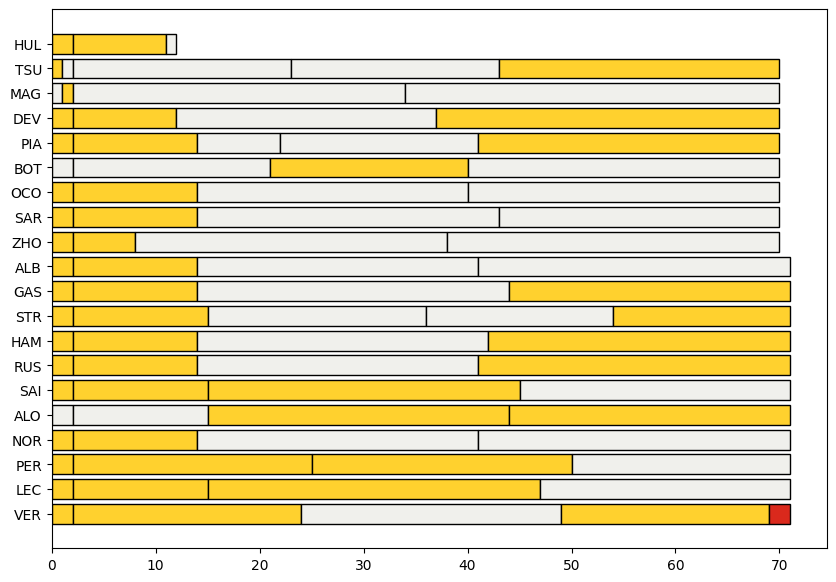

In [56]:
fig, ax = plt.subplots(figsize=(10, 7))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]